In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit

In [23]:
def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlistbinned06.csv")
    f = perdata06['f']
    per = perdata06['per']
    std = perdata06['std']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i],10))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [24]:
bnds=(0.001,0.1),(1.0E-4,1.0E-3),(2.0,5.0),(0,1)
minimizer_kwargs = {"bounds":(bnds)}  # minimizer_kwargs=minimizer_kwargs
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

34.37256161090642
34.37255728306531
34.372451251349815
34.37256160882782
34.37256169580646
72.98956825459426
72.98956894580213
72.98948514197043
72.98956837776224
72.98956528879513
51.28514139908726
51.28514404854587
51.28537951472695
51.285141376130646
51.28514147907233
35.50421948112778
35.50422345271156
35.50447812446705
35.50421946869939
35.504219571611905
34.02467022603339
34.02467093805799
34.02474033131973
34.02467021987401
34.02467031474547
33.94328226604277
33.94328260368067
33.943314450725
33.94328226129818
33.943282354475976
33.911868215092845
33.911867973887794
33.911796141889184
33.91186821429402
33.91186830246539
33.88454044774124
33.884540758076646
33.8845339281621
33.88454044479987
33.88454053607331
33.873981858574325
33.87398233130959
33.87398014950268
33.87398185568653
33.87398194714047
33.86206913329893
33.86206978473195
33.86206583635685
33.86206913092274
33.86206922220572
33.8574254749458
33.85742619579138
33.85742377266961
33.85742547269676
33.85742556404608
33.84

In [25]:
print(m)

                        fun: 27.3086984075292
 lowest_optimization_result:       fun: 27.3086984075292
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.64799729e-02,  3.36078898e+00, -6.92779167e-05,  3.92219590e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 290
      nit: 43
   status: 0
  success: True
        x: array([6.42268334e-03, 1.97570075e-04, 3.90737412e+00, 1.54272214e-01])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 2
                       nfev: 27575
                        nit: 100
                          x: array([6.42268334e-03, 1.97570075e-04, 3.90737412e+00, 1.54272214e-01])


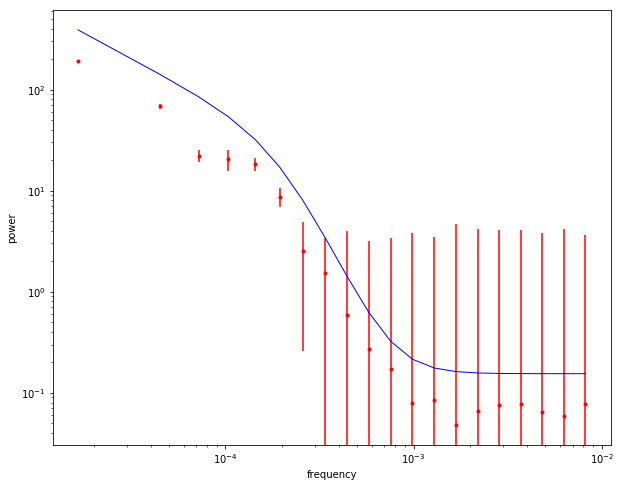

In [26]:
perdata06 = pd.read_csv("perlistbinned06.csv")
f = perdata06['f']
per = perdata06['per']
std = perdata06['std']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.errorbar(f, per, yerr=std, fmt='.r')
plt.plot(f, model, color="b", linewidth=1)
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

In [15]:
def twi_minus_loglikelihood_2(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlistbinned06.csv")
    f = perdata06['f']
    per = perdata06['per']
    std = perdata06['std']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
    s2 = []
    for i in range(f_length):
        s2.append(std[i]**2+model[i]**2)
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += ((per[i]/model[i])**2+math.log(2*np.pi*s2[i],10))
    
    
    D = 0.5*minus_log_p
    print (D)
    return D

In [16]:
bnds=(0.001,0.1),(1.0E-4,1.0E-3),(2.0,5.0),(0,1)
minimizer_kwargs = {"bounds":(bnds)}  # minimizer_kwargs=minimizer_kwargs
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
n = basinhopping(twi_minus_loglikelihood_2,x0_array,minimizer_kwargs=minimizer_kwargs)

28.271246762669012
28.271247147104873
28.271230951017404
28.2712467631193
28.271246763122416
40.28458476470936
40.28430016261202
40.28458508463878
40.28458476400125
40.284584748217775
29.003022446273604
29.0030253303417
29.003052528736053
29.003022446431398
29.00302245024426
28.28959471636223
28.28959615797224
28.289627162357416
28.289594715768914
28.289594718289404
28.265221379286647
28.265222140959025
28.26522541461047
28.265221379291212
28.265221380297536
28.264746185927606
28.26474693522822
28.26474987486693
28.264746185935554
28.26474618693049
28.262921729575563
28.262922428625217
28.26292402347284
28.26292172959706
28.262921730546147
28.256899627398333
28.256900112643816
28.256896184451378
28.2568996274742
28.256899628234503
28.244812124223937
28.24481187536448
28.244801042671124
28.244812124145284
28.244812124951437
28.242706976502852
28.242706907495826
28.242702656023564
28.242706976303474
28.2427069774315
28.242197994488308
28.242197968428307
28.242197514500365
28.242197994194

In [17]:
print (n)

                        fun: 28.235267911835358
 lowest_optimization_result:       fun: 28.235267911835358
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.29061264e-03,  8.48700665e-01, -2.09610107e-05,  2.62900812e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 285
      nit: 29
   status: 0
  success: True
        x: array([4.27339392e-03, 1.98986295e-04, 4.00287135e+00, 7.23906343e-01])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 19060
                        nit: 100
                          x: array([4.27339392e-03, 1.98986295e-04, 4.00287135e+00, 7.23906343e-01])


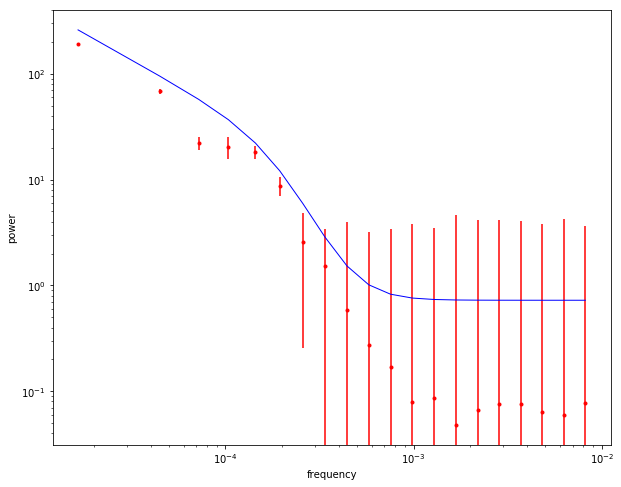

In [18]:
perdata06 = pd.read_csv("perlistbinned06.csv")
f = perdata06['f']
per = perdata06['per']
std = perdata06['std']

alpha_L = 1.0
parameter = n.x
A,f_b,alpha_H,poisson = parameter

model_2 = []
f_length = len(f)
for i in range(f_length):
    model_2.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.errorbar(f, per, yerr=std, fmt='.r')
plt.plot(f, model_2, color="b", linewidth=1)
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()